In [4]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Import file
df = pd.read_csv('all_df.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Avg. Session Duration'] = pd.to_datetime(df['Avg. Session Duration'], format='%H:%M:%S')


In [5]:
#Calculate the emperical means and standard deviations for Revenue, Revenue Plan, Difference, Sessions

rev_mean = np.mean(df['Revenue'])
rev_std = np.std(df['Revenue'])
rev_plan_mean = np.mean(df['Daily Revenue Demand Plan'])
rev_plan_std = np.std(df['Daily Revenue Demand Plan'])
df['Rev Compared to Plan'] = df['Revenue'] - df['Daily Revenue Demand Plan']
rev_to_plan_mean = np.mean(df['Rev Compared to Plan'])
rev_to_plan_std = np.std(df['Rev Compared to Plan'])
sessions_mean = np.mean(df['Sessions'])
sessions_std = np.std(df['Sessions'])

print('Mean Daily Revenue:', rev_mean, 'Standard Deviation Daily Revenue:', rev_std)
print('Mean Daily Revenue Plan:', rev_plan_mean, 'Standard Deviation Daily Revenue Plan:', rev_plan_std)
print('Mean Revenue Compared to Plan:', rev_to_plan_mean, 'Standard Deviation Revenue Compared to Plan:', rev_to_plan_std)
print('Mean Sessions:', sessions_mean, 'Standard Deviation Sessions:', sessions_std)

('Mean Daily Revenue:', 439027.67203342635, 'Standard Deviation Daily Revenue:', 403317.4665129213)
('Mean Daily Revenue Plan:', 479965.0362116992, 'Standard Deviation Daily Revenue Plan:', 377839.4765781399)
('Mean Revenue Compared to Plan:', -40937.364178273034, 'Standard Deviation Revenue Compared to Plan:', 234473.72898690862)
('Mean Sessions:', 226694.13370473537, 'Standard Deviation Sessions:', 96254.62909557922)


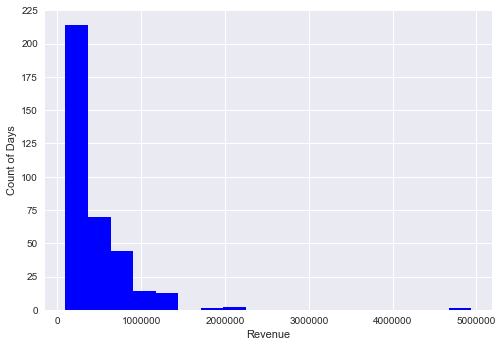

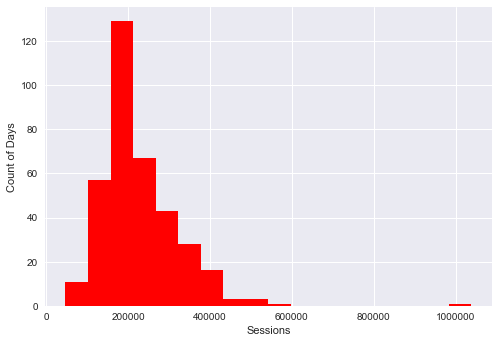

In [6]:
#Create histograms for Sessions & Revenue

#Calculate the bin number
n_data = len(df['Revenue'])
n_bins = int(np.sqrt(n_data))

#Create a histogram to visualize Revenue
_ = plt.hist(df['Revenue'], bins=n_bins, color='b')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count of Days')

plt.show()

#Create a histogram to visualize Sessions
_ = plt.hist(df['Sessions'], bins= n_bins, color='r')
_ = plt.xlabel('Sessions')
_ = plt.ylabel('Count of Days')

plt.show()

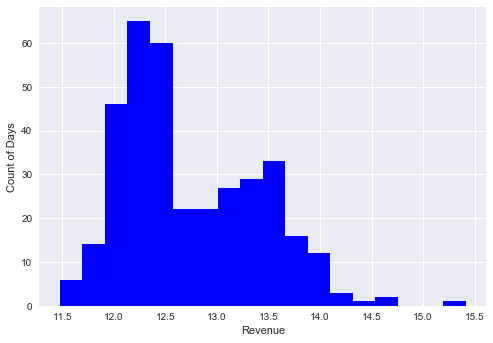

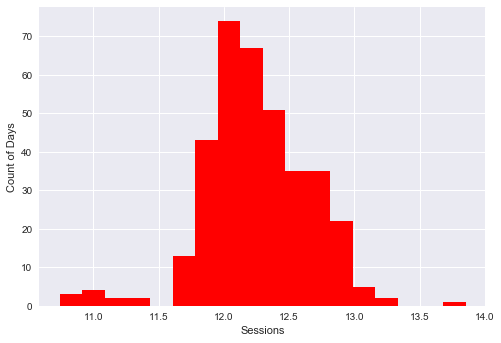

In [8]:
#Create a histogram to visualize Revenue using the log
_ = plt.hist(np.log(df['Revenue']), bins=n_bins, color='b')
_ = plt.xlabel('Revenue')
_ = plt.ylabel('Count of Days')

plt.show()

#Create a histogram to visualize Sessions using the log
_ = plt.hist(np.log(df['Sessions']), bins= n_bins, color='r')
_ = plt.xlabel('Sessions')
_ = plt.ylabel('Count of Days')

plt.show()

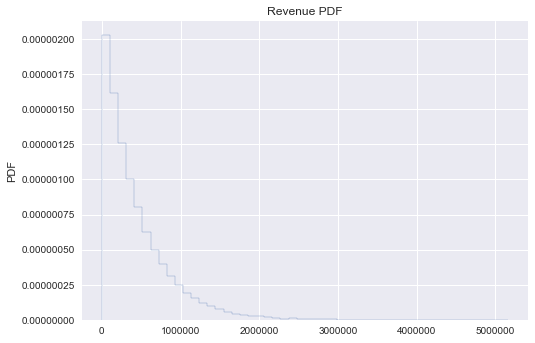

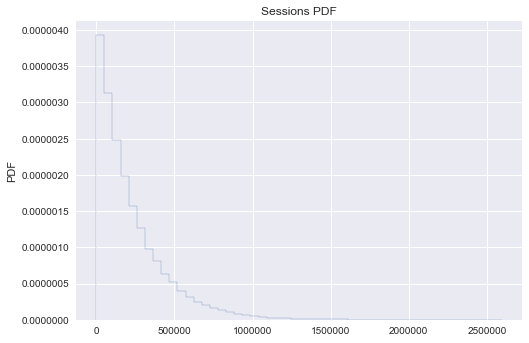

In [4]:
np.random.seed(42)

tau = np.mean(df['Revenue'])
#Draw out of an exponential distribution with parameter tau: Revenue

inter_revenue = np.random.exponential(tau, 100000)

_ = plt.hist(inter_revenue, bins = 50, normed=True, histtype = 'step')
_ = plt.ylabel('PDF')
_ = plt.title('Revenue PDF')
plt.show()

tau2 = np.mean(df['Sessions'])
#Draw out of an exponential distribution with parameter tau: Revenue

inter_sessions = np.random.exponential(tau2, 100000)

_ = plt.hist(inter_sessions, bins = 50, normed=True, histtype = 'step')
_ = plt.ylabel('PDF')
_ = plt.title('Sessions PDF')
plt.show()

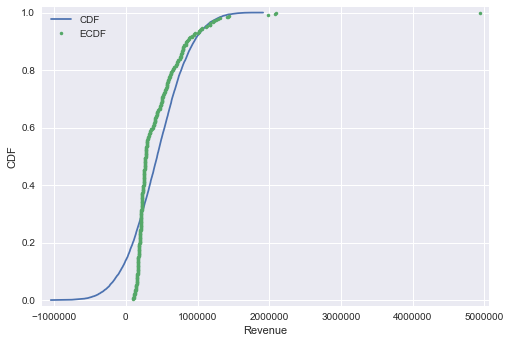

In [5]:
#Compute the ECDF for Revenue Data:

def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1.0, n+1.0) / n
    return x, y

#Create the samples
samples = np.random.normal(rev_mean, rev_std, size=10000)

#Calculate the ECDF of the data and the samples
x_rev, y_rev = ecdf(df['Revenue'])
x_theor, y_theor = ecdf(samples)

#Graph the ECDF of the data and the samples
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_rev, y_rev, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Revenue')
_ = plt.ylabel('CDF')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

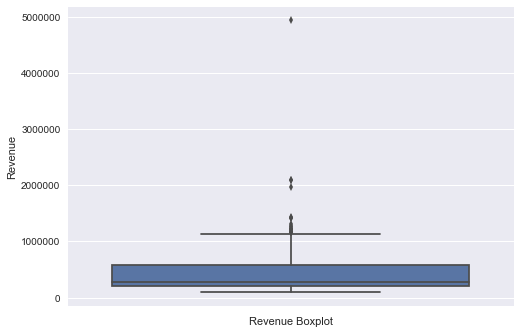

In [6]:
_ = sns.boxplot(y='Revenue', data=df)
_ = plt.xlabel('Revenue Boxplot')
plt.show()

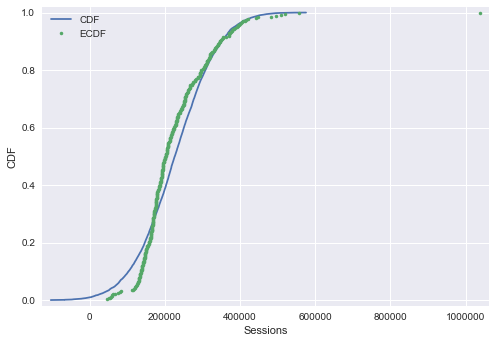

In [7]:
#Compute the ECDF for Session Data:

#Create the samples
samples_sessions = np.random.normal(sessions_mean, sessions_std, size=10000)

#Calculate the ECDF of the data and the samples
x_sessions, y_sessions = ecdf(df['Sessions'])
x_theor_sessions, y_theor_sessions = ecdf(samples_sessions)

#Graph the ECDF of the data and the samples
_ = plt.plot(x_theor_sessions, y_theor_sessions)
_ = plt.plot(x_sessions, y_sessions, marker ='.', linestyle= 'none')
_ = plt.margins(0.02)
_ = plt.xlabel('Sessions')
_ = plt.ylabel('CDF')
_ = plt.legend(('CDF', 'ECDF'), loc='upper left')
plt.show()

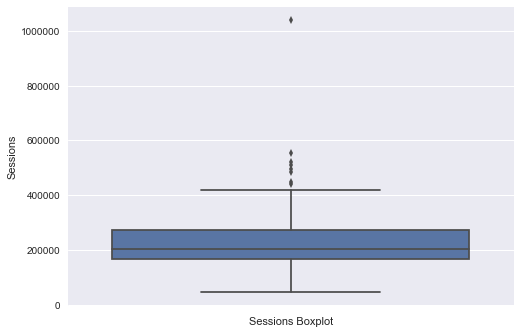

In [8]:
_ = sns.boxplot(y='Sessions', data=df)
_ = plt.xlabel('Sessions Boxplot')
plt.show()

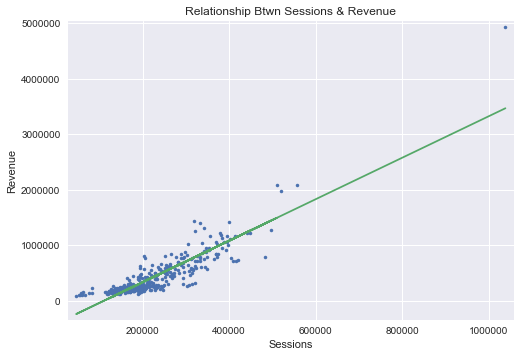

In [9]:
#Create a scatterplot to look at the correlation between Sessions and Revenue

m, b = np.polyfit(df['Sessions'], df['Revenue'], 1)

_ = plt.plot(df['Sessions'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Sessions'], m*df['Sessions'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Sessions')
_ = plt.ylabel('Revenue')
_ = plt.title('Relationship Btwn Sessions & Revenue')

plt.show()

In [10]:
#Compute the covariance of Revenue and Sessions

covariance_matrix = np.cov(df['Revenue'], df['Sessions'])
print 'Covariance Matrix: ', covariance_matrix

cov = covariance_matrix[0,1]
print 'Covariance: ', cov

Covariance Matrix:  [[  1.63119350e+11   3.46687197e+10]
 [  3.46687197e+10   9.29083338e+09]]
Covariance:  34668719678.7


In [11]:
#Compute pearson correlation coefficient
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]

r = pearson_r(df['Revenue'], df['Sessions'])

print 'Pearson R for Revenue and Sessions:', r

Pearson R for Revenue and Sessions: 0.89054880691


In [12]:
slope, intercept = np.polyfit(df['Revenue'], df['Sessions'], 1)

print 'Slope:', slope
print 'Intercept:', intercept


Slope: 0.212535910834
Intercept: 133384.987548


21286.2817447
21568.1193077


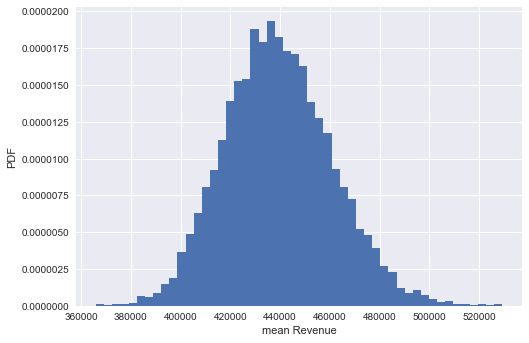

5080.12502377
5098.05711795


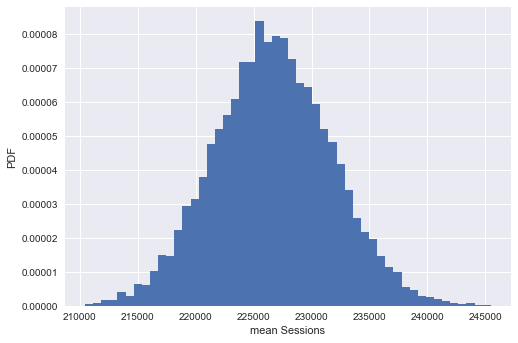

Confidence Intervals Revenue:  [ 400362.2137883  483598.2769422]
Confidence Intervals Sessions:  [ 216794.55271588  236879.73314763]


In [13]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df['Revenue'], np.mean, 10000)

# Compute and print SEM
sem = np.std(df['Revenue'])/ np.sqrt(len(df['Revenue']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean Revenue')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates_sessions = draw_bs_reps(df['Sessions'], np.mean, 10000)

# Compute and print SEM
sem_sessions = np.std(df['Sessions'])/ np.sqrt(len(df['Sessions']))
print(sem_sessions)

# Compute and print standard deviation of bootstrap replicates
bs_std_sessions = np.std(bs_replicates_sessions)
print(bs_std_sessions)

# Make a histogram of the results
_ = plt.hist(bs_replicates_sessions, bins=50, normed=True)
_ = plt.xlabel('mean Sessions')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

conf_int_sessions = np.percentile(bs_replicates_sessions, [2.5, 97.5])

print 'Confidence Intervals Revenue: ', conf_int
print 'Confidence Intervals Sessions: ', conf_int_sessions


[ 3.05329804  4.3547406 ]


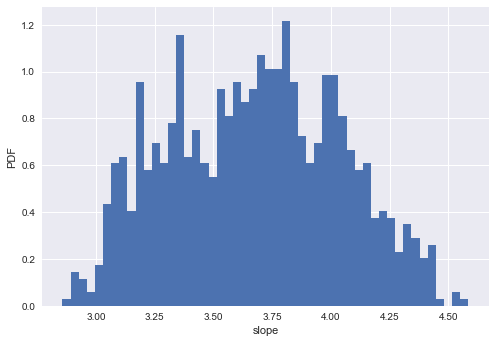

In [14]:
#Pairs Bootstrap

def draw_bs_pairs_linreg(x, y, size=1):

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps


# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(df['Sessions'], df['Revenue'], 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()


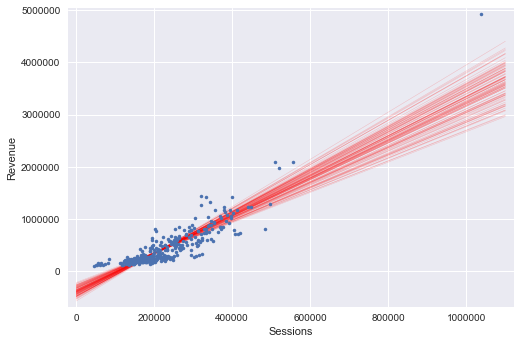

In [15]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,1100000])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(df['Sessions'], df['Revenue'], marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Sessions')
_ = plt.ylabel('Revenue')
plt.margins(0.02)
plt.show()

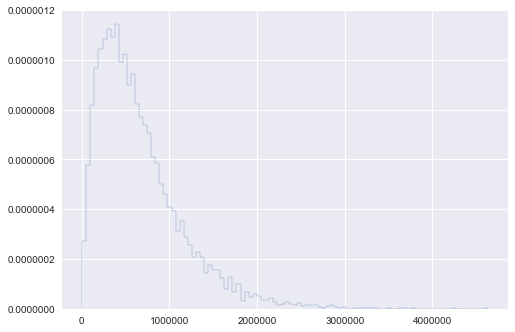

In [16]:
def successive_poisson(tau1, tau2, size=1):
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1 + t2

sample_successive_poisson = successive_poisson(rev_mean, sessions_mean, 10000)

_ = plt.hist(sample_successive_poisson, bins=100, normed = True, histtype='step')
plt.show()

There does appear to be a strong correlation between website traffic (sessions) and revenue. The Pearson R for the dataset for Revenue and Sessions is 0.89. 

There is a single outlier in the data (Cyber Monday) that makes an initial histogram appear to not be a normal curve, however, the histogram built off of the bootstrap data does appear to have a more normal curve.

For the project, it will be important to take into account website traffic. Additional analysis will need to be done to determine if the source of the traffic has any impact on the revenue, i.e. does traffic from Paid Search have a larger impact of revenue than Direct traffic.

**Exploring the relationship between other features and revenue.**

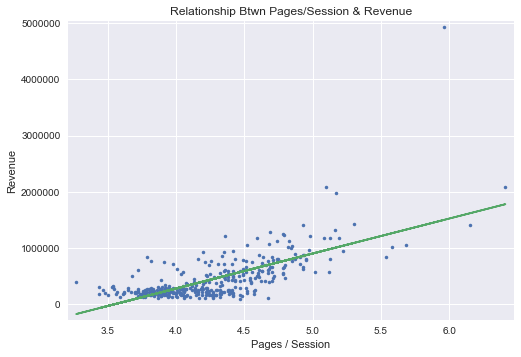

In [17]:
#Create a scatterplot to look at the correlation between pages/session and revenue
m, b = np.polyfit(df['Pages / Session'], df['Revenue'], 1)

_ = plt.plot(df['Pages / Session'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Pages / Session'], m*df['Pages / Session'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Pages / Session')
_ = plt.ylabel('Revenue')
_ = plt.title('Relationship Btwn Pages/Session & Revenue')

plt.show()

In [18]:
#Compute pearson correlation coefficient

r = pearson_r(df['Revenue'], df['Pages / Session'])

print 'Pearson R for Revenue and Pages / Session:', r

Pearson R for Revenue and Pages / Session: 0.690956474713


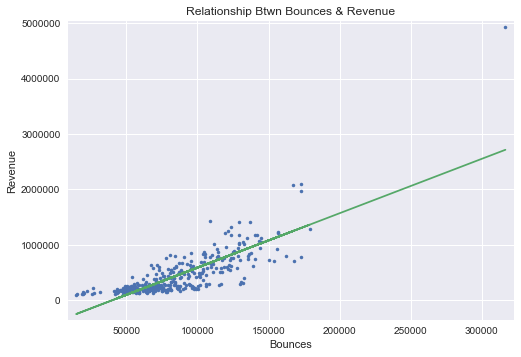

In [19]:
#Create a scatterplot to look at the correlation between Avg. Session Duration and revenue


m, b = np.polyfit(df['Bounces'], df['Revenue'], 1)

_ = plt.plot(df['Bounces'], df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(df['Bounces'], m*df['Bounces'] + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Bounces')
_ = plt.ylabel('Revenue')
_ = plt.title('Relationship Btwn Bounces & Revenue')

plt.show()

In [20]:
#Compute pearson correlation coefficient

r = pearson_r(df['Revenue'], df['Bounces'])

print 'Pearson R for Revenue and Bounces:', r

Pearson R for Revenue and Bounces: 0.811657112898


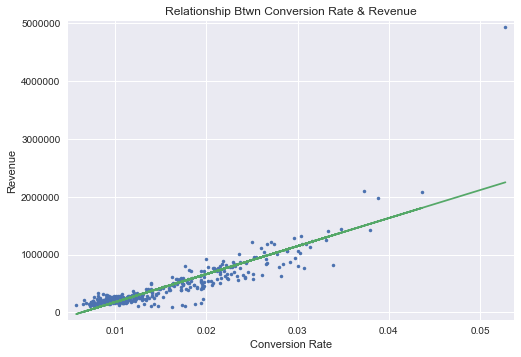

In [21]:
#Create a scatterplot to look at the correlation between Avg. Session Duration and revenue

cvr = df['Transactions']/df['Users']

m, b = np.polyfit(cvr, df['Revenue'], 1)

_ = plt.plot(cvr, df['Revenue'], marker = '.', linestyle = 'none')
_ = plt.plot(cvr, m*cvr + b, '-')
_ = plt.margins(0.02)
_ = plt.xlabel('Conversion Rate')
_ = plt.ylabel('Revenue')
_ = plt.title('Relationship Btwn Conversion Rate & Revenue')

plt.show()

In [24]:
#Compute pearson correlation coefficient

r = pearson_r(df['Revenue'], cvr)

print 'Pearson R for Revenue and Conversion Rate:', r

Pearson R for Revenue and Conversion Rate: 0.874677211149
